In [7]:
import os 
from pathlib import Path
import pandas as pd
import json

In [8]:
data_path = 'train_prostate/train'

In [9]:
import os
import json
import pandas as pd

# Define the data path
data_path = 'train_prostate/train'


patient_ids = []
ages = []
psas = []
ground_truths = []

for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith('.json'):
            if file.startswith('case_') and '_ground_truth' not in file:
                with open(os.path.join(root, file), 'r') as f:
                    case_data = json.load(f)
                patient_ids.append(case_data['patient_id'])
                ages.append(case_data['age'])
                psas.append(case_data['psa'])
            elif '_ground_truth' in file:
                with open(os.path.join(root, file), 'r') as f:
                    ground_truth_data = json.load(f)
                ground_truths.append(ground_truth_data)


data = {
    'patient_id': patient_ids,
    'age': ages,
    'psa': psas,
    'ground_truth': ground_truths
}

df = pd.DataFrame(data)

print(df)


    patient_id  age    psa ground_truth
0    case_0086   73  10.28          Low
1    case_0087   62   3.06          Low
2    case_0088   78   9.42          Low
3    case_0089   66   5.97          Low
4    case_0090   57  12.01         High
..         ...  ...    ...          ...
290  case_0376   68   9.60         High
291  case_0377   73   7.80          Low
292  case_0378   74   8.90         High
293  case_0379   72  14.00         High
294  case_0380   52  11.50          Low

[295 rows x 4 columns]


In [10]:
import os
import json
import pandas as pd
import nibabel as nib

# Define the data path
data_path = 'train_prostate/train'

# Initialize lists to store extracted data
patient_ids_nii = []
nii_data = []

# Traverse through the directory
for root, dirs, files in os.walk(data_path):
    for file in files:
        # Check if the file is a NII file
        if file.endswith('.gz'):
            # Read NII file
            nii_img = nib.load(os.path.join(root, file))
            # Extract information
            patient_ids_nii.append(os.path.basename(root))
            nii_data.append(nii_img.get_fdata())

# Combine extracted data into a DataFrame
nii_df = pd.DataFrame({'patient_id': patient_ids_nii, 'nii_data': nii_data})

# Print the DataFrame
print(nii_df)

    patient_id                                           nii_data
0    case_0086  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
1    case_0087  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
2    case_0088  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
3    case_0089  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
4    case_0090  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
..         ...                                                ...
290  case_0376  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
291  case_0377  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
292  case_0378  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
293  case_0379  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
294  case_0380  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...

[295 rows x 2 columns]


In [11]:
# Merge the two DataFrames on 'patient_id'
merged_df = pd.merge(df, nii_df, on='patient_id')

print(merged_df)

    patient_id  age    psa ground_truth  \
0    case_0086   73  10.28          Low   
1    case_0087   62   3.06          Low   
2    case_0088   78   9.42          Low   
3    case_0089   66   5.97          Low   
4    case_0090   57  12.01         High   
..         ...  ...    ...          ...   
290  case_0376   68   9.60         High   
291  case_0377   73   7.80          Low   
292  case_0378   74   8.90         High   
293  case_0379   72  14.00         High   
294  case_0380   52  11.50          Low   

                                              nii_data  
0    [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  
1    [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  
2    [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  
3    [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  
4    [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  
..                                                 ...  
290  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  
291  [[[0.0, 0.0, 0.0, 0.0,

In [12]:
print("Dimensions of the first element in nii_data column:", merged_df['nii_data'].iloc[0].shape)

Dimensions of the first element in nii_data column: (256, 256, 24)


In [13]:
#data imbalance
class_counts = merged_df['ground_truth'].value_counts()
print(class_counts)

ground_truth
Low     210
High     85
Name: count, dtype: int64


In [14]:
# for index, nii_image in enumerate(merged_df['nii_data']):
#     image_shape = nii_image.shape
#     # Print the shape of the NII image
#     print(f"Shape of NII image {index + 1}: {image_shape}")
    
import numpy as np
max_shape = (0, 0, 0)  # Initialize with a shape of (0, 0, 0)
max_image_index = -1

for index, nii_image in enumerate(merged_df['nii_data']):
    image_shape = nii_image.shape
    if np.prod(image_shape) > np.prod(max_shape):
        max_shape = image_shape
        max_image_index = index

print(f"Image with maximum shape - Index: {max_image_index}, Shape: {max_shape}")


Image with maximum shape - Index: 163, Shape: (256, 256, 40)


In [15]:
merged_df['ground_truth'] = merged_df['ground_truth'].replace({'Low': 0, 'High': 1})

In [16]:
merged_df

,patient_id,age,psa,ground_truth,nii_data
0,case_0086,73,10.28,0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,case_0087,62,3.06,0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,case_0088,78,9.42,0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
3,case_0089,66,5.97,0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,case_0090,57,12.01,1,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
...,...,...,...,...,...
290,case_0376,68,9.60,1,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
291,case_0377,73,7.80,0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
292,case_0378,74,8.90,1,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
293,case_0379,72,14.00,1,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."


In [17]:
import pandas as pd
from sklearn.utils import resample

# Assuming merged_df is your DataFrame and 'ground_truth' is your column containing the labels

# Separate majority and minority classes
majority_class = merged_df[merged_df['ground_truth'] == 0]
minority_class = merged_df[merged_df['ground_truth'] == 1]

# Oversample minority class
upsampled_minority_class = resample(minority_class,
                                      replace=True,  # sample without replacement
                                      n_samples=len(majority_class),  # match minority class
                                      random_state=42)  # reproducible results

# Combine majority class with oversampled minority class
upsampled_df = pd.concat([majority_class, upsampled_minority_class])

# Shuffle the dataset
upsampled_df = upsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)



In [18]:
#data imbalance
class_counts = upsampled_df['ground_truth'].value_counts()
print(class_counts)

ground_truth
0    210
1    210
Name: count, dtype: int64


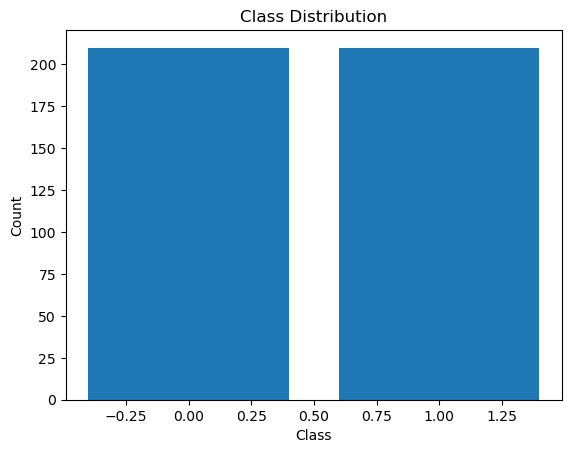

Class Proportions:
ground_truth
0    0.5
1    0.5
Name: proportion, dtype: float64


In [19]:
import matplotlib.pyplot as plt

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Calculate class proportions
class_proportions = upsampled_df['ground_truth'].value_counts(normalize=True)
print("Class Proportions:")
print(class_proportions)

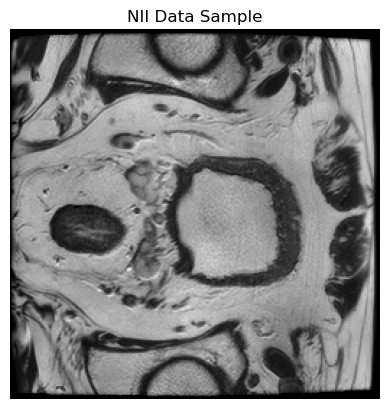

In [20]:
import matplotlib.pyplot as plt

# Choose an index for the sample you want to display
sample_index = 0

nii_sample_data = upsampled_df['nii_data'].iloc[sample_index]
plt.imshow(nii_sample_data[:, :, 0], cmap='gray')
plt.axis('off') 
plt.title('NII Data Sample') 
plt.show()


In [21]:
from scipy import ndimage

def resize_volume(img):
    """Resize NII data images"""
    # Set the desired dimensions
    desired_shape = (256, 256, 40)
    # Get current dimensions
    current_shape = img.shape
    # Compute resize factors for each dimension
    resize_factors = (desired_shape[0] / current_shape[0],
                      desired_shape[1] / current_shape[1],
                      desired_shape[2] / current_shape[2])
    # Resize the image
    resized_img = ndimage.zoom(img, resize_factors, order=1)
    return resized_img

In [22]:
upsampled_df['resized_nii_data'] = upsampled_df['nii_data'].apply(resize_volume)

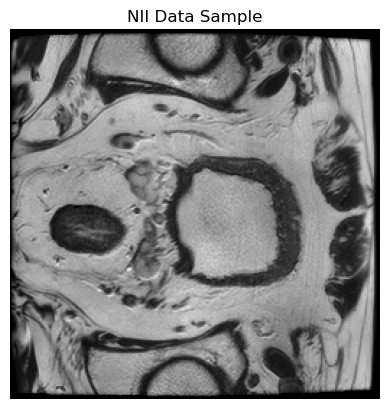

In [23]:
import matplotlib.pyplot as plt

# Choose an index for the sample you want to display
sample_index = 0

nii_sample_data = upsampled_df['nii_data'].iloc[sample_index]
plt.imshow(nii_sample_data[:, :, 0], cmap='gray')
plt.axis('off') 
plt.title('NII Data Sample') 
plt.show()

In [24]:
# Loop through all images in the nii_data column
for index, nii_image in enumerate(upsampled_df['resized_nii_data']):
    # Get the shape of the NII image
    image_shape = nii_image.shape
    # Print the shape of the NII image
    print(f"Shape of NII image {index + 1}: {image_shape}")


Shape of NII image 1: (256, 256, 40)
Shape of NII image 2: (256, 256, 40)
Shape of NII image 3: (256, 256, 40)
Shape of NII image 4: (256, 256, 40)
Shape of NII image 5: (256, 256, 40)
Shape of NII image 6: (256, 256, 40)
Shape of NII image 7: (256, 256, 40)
Shape of NII image 8: (256, 256, 40)
Shape of NII image 9: (256, 256, 40)
Shape of NII image 10: (256, 256, 40)
Shape of NII image 11: (256, 256, 40)
Shape of NII image 12: (256, 256, 40)
Shape of NII image 13: (256, 256, 40)
Shape of NII image 14: (256, 256, 40)
Shape of NII image 15: (256, 256, 40)
Shape of NII image 16: (256, 256, 40)
Shape of NII image 17: (256, 256, 40)
Shape of NII image 18: (256, 256, 40)
Shape of NII image 19: (256, 256, 40)
Shape of NII image 20: (256, 256, 40)
Shape of NII image 21: (256, 256, 40)
Shape of NII image 22: (256, 256, 40)
Shape of NII image 23: (256, 256, 40)
Shape of NII image 24: (256, 256, 40)
Shape of NII image 25: (256, 256, 40)
Shape of NII image 26: (256, 256, 40)
Shape of NII image 27

In [25]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(upsampled_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [26]:
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Testing set size:", len(test_df))

Training set size: 268
Validation set size: 68
Testing set size: 84


In [27]:
train_df['resized_nii_data'].iloc[10].shape

(256, 256, 40)

In [28]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
import numpy as np

X_train = np.array(train_df['resized_nii_data'].tolist())
X_val = np.array(val_df['resized_nii_data'].tolist())
X_test = np.array(test_df['resized_nii_data'].tolist())

# Extract the ground truth labels
y_train = train_df['ground_truth']
y_val = val_df['ground_truth']
y_test = test_df['ground_truth']

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
KNN = KNeighborsClassifier()

In [27]:
print(train_df.shape)

(268, 6)


In [26]:
print(X_train.shape)

(268, 256, 256, 40)


In [32]:
print(y_train.shape)

(268,)


In [29]:
num_samples = X_train.shape[0]
X_train_reshaped = X_train.reshape(num_samples, -1)  # Flatten remaining dimensions

In [31]:
KNN.fit(X_train_reshaped,y_train)

KNeighborsClassifier()

In [34]:
num_samples = X_test.shape[0]
X_test_reshaped = X_test.reshape(num_samples, -1)  # Flatten remaining dimensions

In [35]:
predict = KNN.predict(X_test_reshaped)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70        39
           1       0.77      0.60      0.68        45

    accuracy                           0.69        84
   macro avg       0.70      0.70      0.69        84
weighted avg       0.71      0.69      0.69        84



In [47]:
confusion_mat = confusion_matrix(y_test,predict)

In [48]:
import seaborn as sns

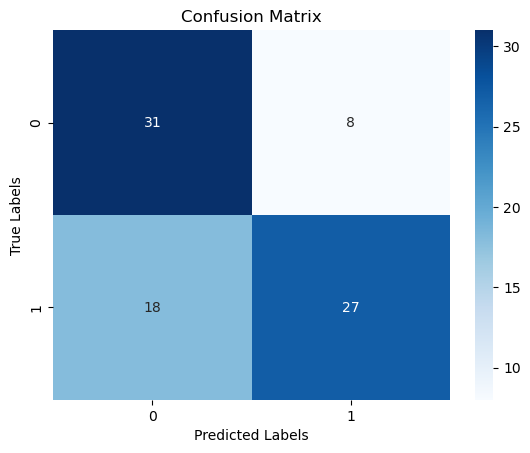

In [50]:
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Naive_Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
NBayes = MultinomialNB()

In [42]:
NBayes.fit(X_train_reshaped,y_train)

MultinomialNB()

In [43]:
Prediction = NBayes.predict(X_test_reshaped)

In [44]:
print(classification_report(y_test,Prediction))

              precision    recall  f1-score   support

           0       0.58      0.90      0.71        39
           1       0.83      0.44      0.58        45

    accuracy                           0.65        84
   macro avg       0.71      0.67      0.64        84
weighted avg       0.72      0.65      0.64        84



In [51]:
confusion_matrixNB = confusion_matrix(y_test,Prediction)

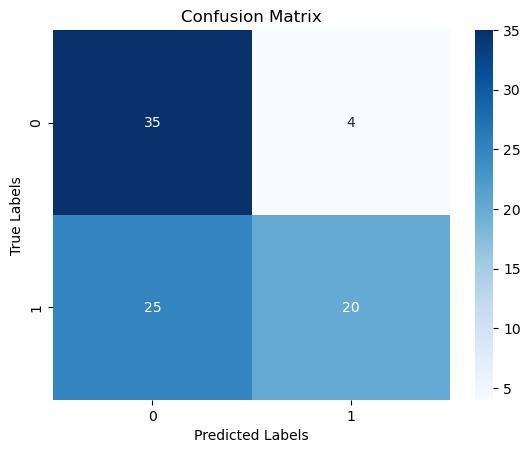

In [52]:
sns.heatmap(confusion_matrixNB, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# CNN with one layer

In [41]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
import numpy as np

# Define your CNN model
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(256, 256, 40, 1), padding='same'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape the input data to fit the model
X_train = X_train.reshape(X_train.shape[0], 256, 256, 40, 1)
X_val = X_val.reshape(X_val.shape[0], 256, 256, 40, 1)
X_test = X_test.reshape(X_test.shape[0], 256, 256, 40, 1)

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=2, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 135s 991ms/step - accuracy: 0.5737 - loss: 10.4500 - val_accuracy: 0.6765 - val_loss: 0.5758
Epoch 2/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 120s 898ms/step - accuracy: 0.8495 - loss: 0.3959 - val_accuracy: 0.8824 - val_loss: 0.3395
Epoch 3/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 115s 855ms/step - accuracy: 0.9680 - loss: 0.1082 - val_accuracy: 0.8529 - val_loss: 0.2700
Epoch 4/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 120s 893ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9118 - val_loss: 0.2406
Epoch 5/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 116s 863ms/step - accuracy: 1.0000 - loss: 2.4153e-04 - val_accuracy: 0.8088 - val_loss: 0.3540
Epoch 6/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 117s 874ms/step - accuracy: 1.0000 - loss: 7.3878e-05 - val_accuracy: 0.9265 - val_loss: 0.2304
Epoch 7/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 115s 860ms/step - accuracy: 1.0000 - loss: 1.7452e-05 - val_accuracy: 0.9265 - val_loss: 0.2266
Epoch 8/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 112s 834ms/step - accur

# Multi CNN model

In [23]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
import numpy as np

# Assuming you have already loaded your data and preprocessed it
X_train = np.array(train_df['resized_nii_data'].tolist())
X_val = np.array(val_df['resized_nii_data'].tolist())
X_test = np.array(test_df['resized_nii_data'].tolist())

# Extract the ground truth labels
y_train = train_df['ground_truth']
y_val = val_df['ground_truth']
y_test = test_df['ground_truth']



# Define your CNN model
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(256, 256, 40, 1), padding='same'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization())
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape the input data to fit the model
X_train = X_train.reshape(X_train.shape[0], 256, 256, 40, 1)
X_val = X_val.reshape(X_val.shape[0], 256, 256, 40, 1)
X_test = X_test.reshape(X_test.shape[0], 256, 256, 40, 1)

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=2, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 706s 5s/step - accuracy: 0.5825 - loss: 423.7877 - val_accuracy: 0.4706 - val_loss: 99.9545
Epoch 2/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 707s 5s/step - accuracy: 0.7253 - loss: 91.2435 - val_accuracy: 0.5147 - val_loss: 20.2526
Epoch 3/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 727s 5s/step - accuracy: 0.7133 - loss: 2.2006 - val_accuracy: 0.5441 - val_loss: 0.6976
Epoch 4/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 731s 5s/step - accuracy: 0.7404 - loss: 0.7158 - val_accuracy: 0.6029 - val_loss: 1.4350
Epoch 5/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 683s 5s/step - accuracy: 0.7434 - loss: 0.6608 - val_accuracy: 0.6765 - val_loss: 1.1874
Epoch 6/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 732s 5s/step - accuracy: 0.7927 - loss: 0.4548 - val_accuracy: 0.7500 - val_loss: 2.0290
Epoch 7/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 702s 5s/step - accuracy: 0.7754 - loss: 0.6105 - val_accuracy: 0.7647 - val_loss: 1.2604
Epoch 8/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 686s 5s/step - accuracy: 0.7862 - loss: 0.4652 - val